In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

In [6]:
m_train = x_train.shape[0]
m_test = x_test.shape[0]
x_train_dim = x_train.shape
y_train_dim = y_train.shape
x_test_dim = x_test.shape
y_test_dim = y_test.shape
print("The number of training examples: " + str(m_train))
print("The number of test examples: " + str(m_test))
print("x_train shape: " + str(x_train_dim))
print("y_train shape: " + str(y_train_dim))
print("x_test shape:" + str(x_test_dim))
print("y_test shape:" + str(y_test_dim))

The number of training examples: 60000
The number of test examples: 10000
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape:(10000, 28, 28)
y_test shape:(10000,)


In [11]:
# Adding the number of channels as dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


The y-label is: Shirt


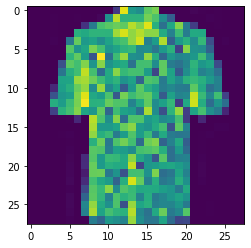

In [12]:
classes = {0:'T-Shirt/Top', 1:'Trouser', 2:'pullover', 3:'Dress', 4:'Coat', 5:'Sandal',6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}
plt.figure()
index = 6784
plt.imshow(x_train[index,:,:,0])
print("The y-label is: " + str(classes[y_train[index]]))

In [13]:
# Normalizing the input dataset
x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
# Converting the y-labels to one-hot vector
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [15]:
# Creating the model
model = Sequential()
model.add(Flatten())
model.add(Dense(1024, activation='relu', input_dim=(28,28,1)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
Model = model.fit(x_train, Y_train, epochs=16, batch_size=512, verbose=1)


Epoch 1/16
60000/60000 [==============================] - 14s 238us/step - loss: 0.5396 - accuracy: 0.8080
Epoch 2/16
60000/60000 [==============================] - 14s 240us/step - loss: 0.3680 - accuracy: 0.8668
Epoch 3/16
60000/60000 [==============================] - 13s 218us/step - loss: 0.3370 - accuracy: 0.8766
Epoch 4/16
60000/60000 [==============================] - 14s 228us/step - loss: 0.3071 - accuracy: 0.8864
Epoch 5/16
60000/60000 [==============================] - 13s 214us/step - loss: 0.2969 - accuracy: 0.8906
Epoch 6/16
60000/60000 [==============================] - 13s 222us/step - loss: 0.2804 - accuracy: 0.8959
Epoch 7/16
60000/60000 [==============================] - 13s 216us/step - loss: 0.2723 - accuracy: 0.8982
Epoch 8/16
60000/60000 [==============================] - 13s 217us/step - loss: 0.2558 - accuracy: 0.9034
Epoch 9/16
60000/60000 [==============================] - ETA: 0s - loss: 0.2523 - accuracy: 0.90 - 13s 216us/step - loss: 0.2524 - accuracy: 0

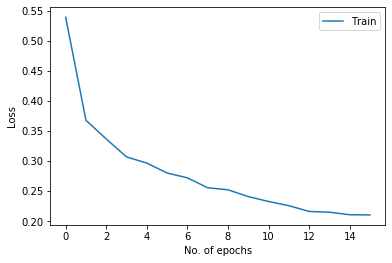

In [18]:
plt.plot(Model.history['loss'])
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper right')
plt.show()

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [21]:
(loss, accuracy) = model.evaluate(x_test,Y_test, verbose = 0)
print("The loss calculated on test set is: " + str(loss))
print("The accuracy calculated on test set is: " + str(accuracy))

The loss calculated on test set is: 0.332069222342968
The accuracy calculated on test set is: 0.8851000070571899


In [22]:
# Predicting the trained model on the testset
index_pred = model.predict(np.array(x_test))

The below object is - Trouser
The prediction for below object is -  Trouser


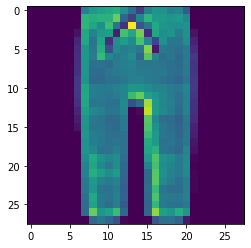

In [23]:
test_index = 7805
plt.imshow(x_test[test_index,:,:,0])
print('The below object is - ' + str(classes[y_test[test_index]]))
print('The prediction for below object is -  ' + str(classes[np.argmax(index_pred[test_index])]))